In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [15]:
df = pd.read_csv("D:\Portfolio_dataset\education_cost_clean.csv")

# Quick check
print(df.head())
print(df.info())

     Country                      University  Tuition_USD  Living_Cost  \
0        USA              Harvard University        55400    83.500000   
1         UK         Imperial College London        41200    75.800003   
2     Canada           University of Toronto        38500    72.500000   
3  Australia         University of Melbourne        42000    71.199997   
4    Germany  Technical University of Munich          500    70.500000   

   Total_Cost  
0     55483.5  
1     41275.8  
2     38572.5  
3     42071.2  
4       570.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      907 non-null    object 
 1   University   907 non-null    object 
 2   Tuition_USD  907 non-null    int64  
 3   Living_Cost  907 non-null    float64
 4   Total_Cost   907 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 35.6+ K

In [5]:
# Summary statistics
print(df.describe(include='all'))

# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

       Country                University   Tuition_USD  Living_Cost  \
count      907                       907    907.000000   907.000000   
unique      71                       622           NaN          NaN   
top         UK  University of Washington           NaN          NaN   
freq        93                         6           NaN          NaN   
mean       NaN                       NaN  16705.016538    64.437486   
std        NaN                       NaN  16582.385275    14.056333   
min        NaN                       NaN      0.000000    27.799999   
25%        NaN                       NaN   2850.000000    56.300001   
50%        NaN                       NaN   7500.000000    67.500000   
75%        NaN                       NaN  31100.000000    72.200001   
max        NaN                       NaN  62000.000000   122.400002   

          Total_Cost  
count     907.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    16769.454024  
std     1

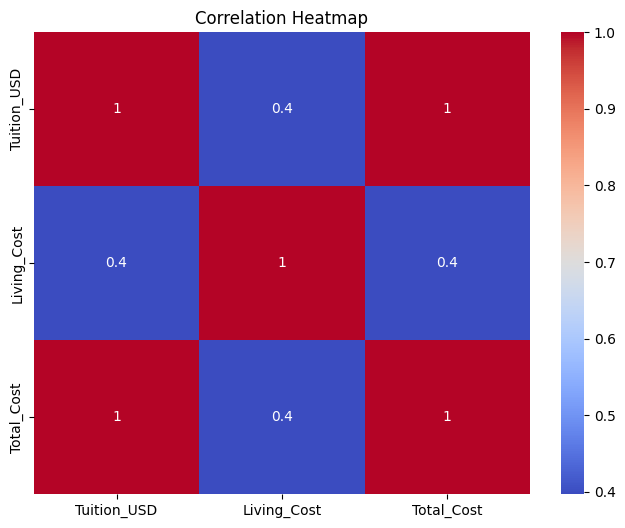

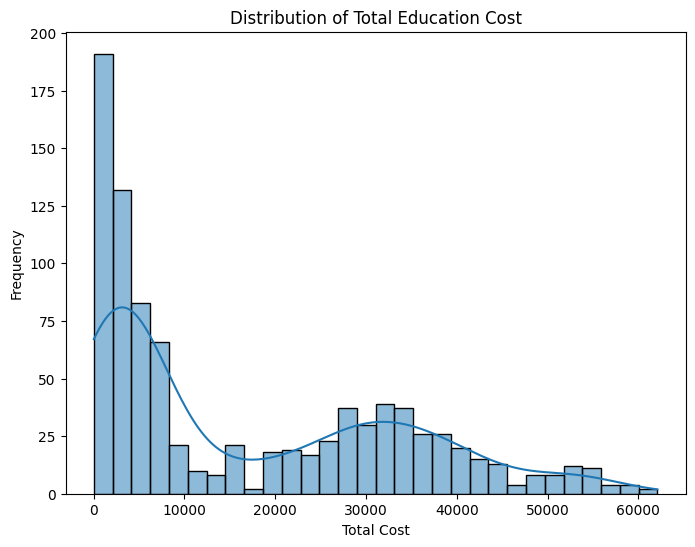

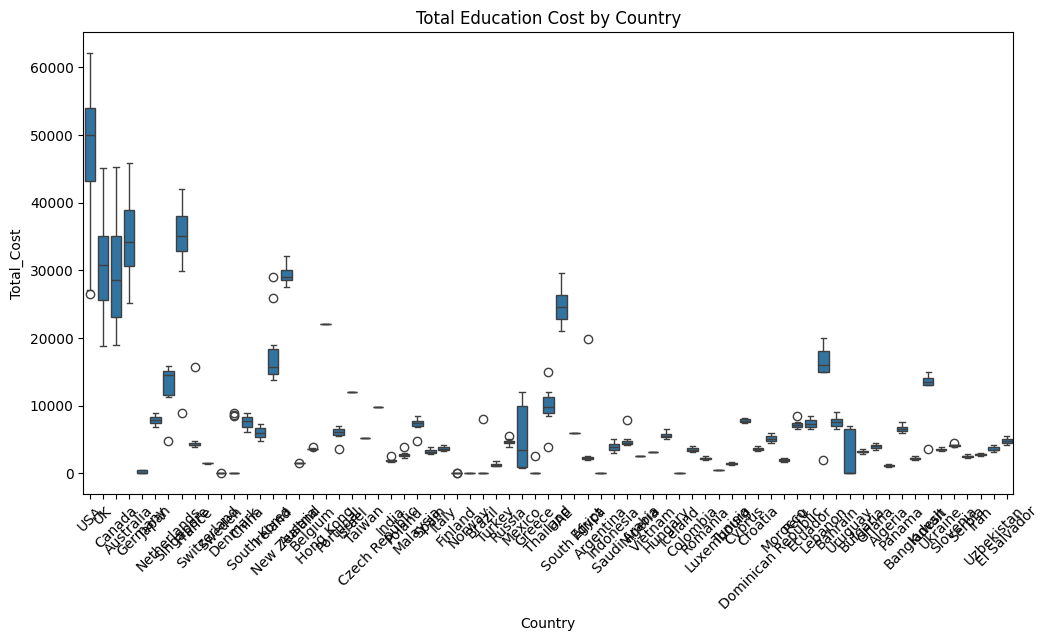

In [6]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Tuition_USD','Living_Cost','Total_Cost']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Total Cost
plt.figure(figsize=(8,6))
sns.histplot(df['Total_Cost'], kde=True, bins=30)
plt.title("Distribution of Total Education Cost")
plt.xlabel("Total Cost")
plt.ylabel("Frequency")
plt.show()

# Boxplot by country
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Country', y='Total_Cost')
plt.xticks(rotation=45)
plt.title("Total Education Cost by Country")
plt.show()


In [7]:
# Features (X) and target (y)
X = df[['Tuition_USD', 'Living_Cost']]
y = df['Total_Cost']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Total_Cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.163e+22
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:02:15   Log-Likelihood:                 10926.
No. Observations:                 907   AIC:                        -2.185e+04
Df Residuals:                     904   BIC:                        -2.183e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.993e-07   2.26e-07     -1.327      

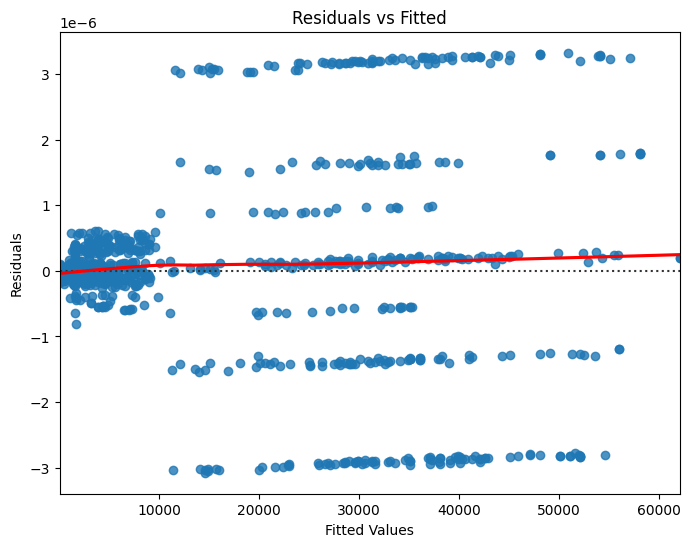

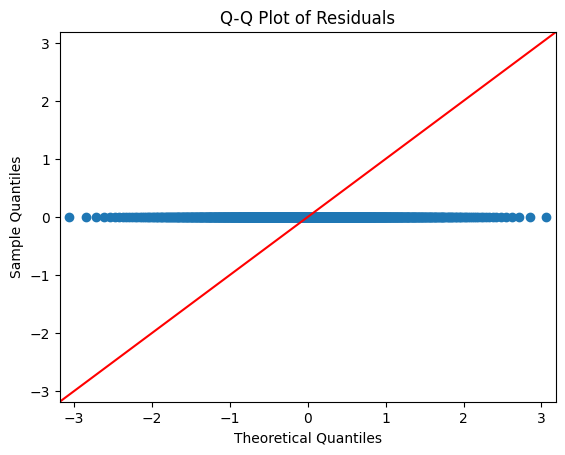

In [8]:
# Residual vs Fitted plot
plt.figure(figsize=(8,6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color':'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Q-Q plot
sm.qqplot(model.resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [9]:
print("Adjusted R-squared:", model.rsquared_adj)

coeffs = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.params
}).sort_values(by="Coefficient", ascending=False)

print("\nTop predictors of Total Cost:")
print(coeffs)

Adjusted R-squared: 1.0

Top predictors of Total Cost:
                Variable   Coefficient
Living_Cost  Living_Cost  1.000000e+00
Tuition_USD  Tuition_USD  1.000000e+00
const              const -2.992832e-07
